# Survival Prediction on the Titanic


In [1016]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [1018]:
# import data and load data set in a variable
titanic = pd.read_csv('data/Titanic.csv')

In [1020]:
# Dimensionality of the Dataframe
titanic.shape

(891, 12)

In [1022]:
# Checking the first n rows of the object. By default n=5
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Variable definitions
**PassengerId**: Primary key

**Survived**: 0=No, 1=Yes

**Pclass**: 1=1st Class, 2=2nd Class, 3=3rd Class

**Sex**: Male/Female

**Age**: Numeric *(in years)*

**SibSp**: Number of siblings on board the Titanic

**Parch**: Number of parents/children on board the Titanic

**Ticket**: Ticket Number

**Fare**: Ticket price

**Cabin**: Cabin Number on the Titanic

**Embarked**: Port of embarkation, where C=Cherbourg, Q=Queenstown, S=Southampton

In [1025]:
# Descriptive statistics
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1037]:
# Skewness and Kurtosis for numerical columns
for column in titanic.select_dtypes(include='number'):
    print(f'{column} Skewness: {skew(titanic[column].dropna())}')
    print(f'{column} Kurtosis: {kurtosis(titanic[column].dropna())}')

PassengerId Skewness: 0.0
PassengerId Kurtosis: -1.200003023126921
Survived Skewness: 0.4777174662568536
Survived Kurtosis: -1.7717860224331319
Pclass Skewness: -0.6294858816096934
Pclass Kurtosis: -1.2795696818700388
Sex Skewness: 0.6178784065548291
Sex Kurtosis: -1.618226274713265
Age Skewness: 0.3882898514698657
Age Kurtosis: 0.16863657224286044
SibSp Skewness: 3.6891276847759507
SibSp Kurtosis: 17.77351174692092
Parch Skewness: 2.7444867379203735
Parch Kurtosis: 9.716613236667277
Fare Skewness: 4.7792532923723545
Fare Kurtosis: 33.20428925264474


In [1027]:
# Checking all column types in the dataframe
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [1029]:
# Correlation matrics between numerical datas in the pandas dataframe

# Converting sex to numerical data to add it to correlation matrix
titanic_temp = titanic
titanic_temp['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
# selecting only numerical values since correlation method can only be applied on numeric datatypes
#numeric_titanic_df = titanic_sex_numerical.select_dtypes(include=[float, int])
numeric_titanic_df = titanic_temp.select_dtypes(include='number')
numeric_titanic_df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


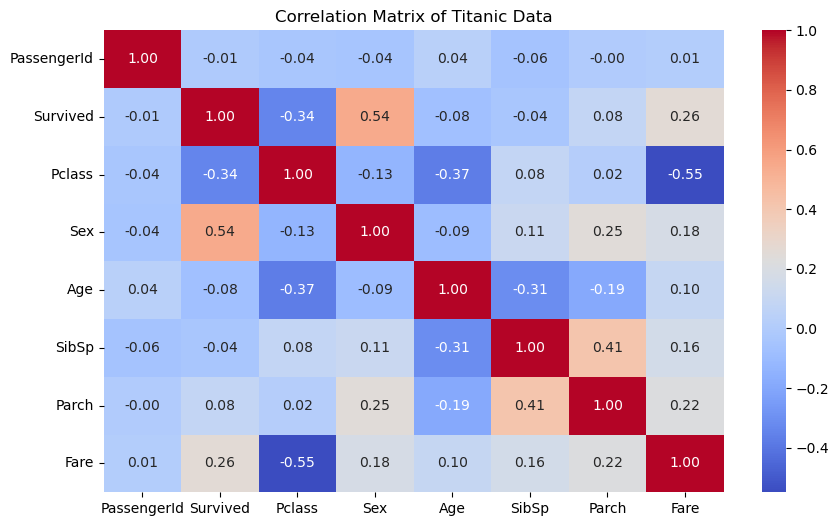

In [1031]:
# Showing the heatmap produced from the correlation matrix drawn above

correlation_matrix = numeric_titanic_df.corr()
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Titanic Data')
plt.show()

In [1035]:
# Count number of missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Cleaning Data
We notice missing data in 3 columns (Age, Cabin and Embarked). This needs to be either cleaned, dropped or filled with values before running any analysis on the data frame.

*Age would be a good column to use in statistical analysis so filling the missing rows in Age column with median age, reason being it provides a better central tendency measure in distributions that are not symmetric*

*Filling the Embarked columns with mode of the column since the data is categorical*

*Cabin number might be a column that may not really be used for statistical analysis so we can drop the column*


In [960]:
# Filling missing age with median age
# titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [962]:
# Filling missing embarked values with mode of embarked column
# titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [964]:
# Dropping cabin column since it might not be relevant and has too many missing rows to be filled
titanic.drop(columns='Cabin', inplace=True)

In [966]:
# Recount number of missing values to check if all missing values have been filled
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [968]:
def plot_relational_scatter_age_fare(titanic):
    """
    Creates a scatter plot of Age vs Fare colored by survival status

    The plot displays:
    - Age on the x-axis
    - Fare on the y-axis
    - Points colored by the survival status (red for Not Survived and green for Survived
    """
    plt.figure(figsize=(10, 6))

    # Create the scatter plot without the legend initially due to color mismatch in graph
    sns.scatterplot(data=titanic, x='Age', y='Fare', hue='Survived', 
                    alpha=0.6, palette=['red', 'green'], legend=None)

    # Customize the legend manually as legend not depicting correct color due to some reason
    plt.scatter([], [], color='red', alpha=0.6, label='Not Survived')
    plt.scatter([], [], color='green', alpha=0.6, label='Survived')
    plt.legend(title='Survival Status')

    # Title and labels
    plt.title('Scatter Plot of Age vs Fare by Survival Status')
    plt.xlabel('Age')
    plt.ylabel('Fare')
    #plt.legend(title='Survival Status', loc='upper right', labels=['Not Survived', 'Survived'])
    
    plt.grid(True)
    plt.show()

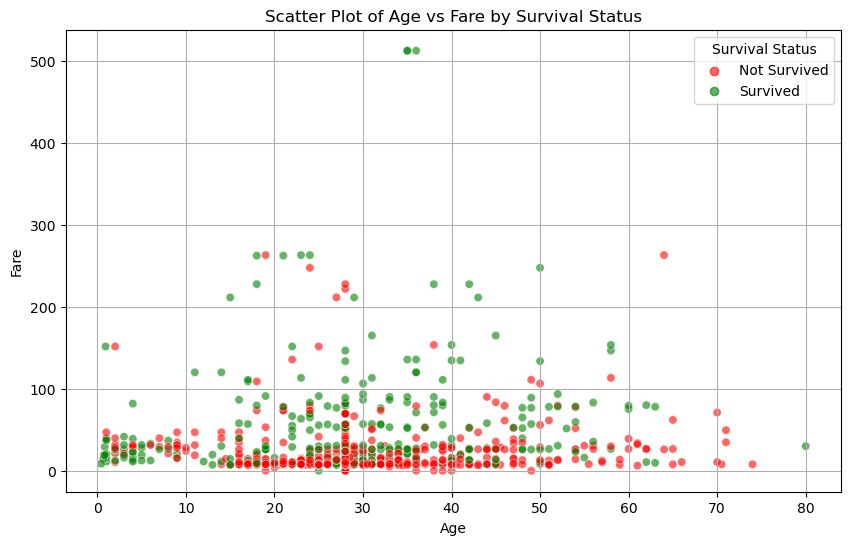

In [970]:
plot_relational_scatter_age_fare(titanic)

In [980]:
def plot_categorial_survival_counts_sex_and_pclass(titanic):
    """
    Creates side-by-side count plots to visualize survival counts based on passenger sex and class.
    
    The function creates two subplots:
    1. A count plot of survival counts grouped by sex.
    2. A count plot of survival counts grouped by passenger class.
    
    The plots include counts displayed above each bar, and a color legend indicating survival status.
    """
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # First plot: Survival Counts by Sex
    sns.countplot(data=titanic, x='Sex', hue='Survived', palette=['red', 'green'], alpha=0.6, ax=axes[0])

    # Title, labels and legend
    axes[0].set_title('Survival Counts by Sex')
    axes[0].set_xlabel('Sex')
    axes[0].set_ylabel('Count of Passengers')
    axes[0].legend(title='Survived', labels=['Not Survived', 'Survived'])

    # Second plot: Survival Counts by Pclass
    sns.countplot(data=titanic, x='Pclass', hue='Survived', palette=['red', 'green'], alpha=0.5, ax=axes[1])

    # Title, labels and legend
    axes[1].set_title('Survival Counts by Passenger Class')
    axes[1].set_xlabel('Passenger Class')
    axes[1].set_ylabel('Count of Passengers')
    axes[1].legend(title='Survived', labels=['Not Survived', 'Survived'])

    # Add counts on each bar for the both plots
    for i in range(2):
        for p in axes[i].patches:
            if p.get_height() > 0:
                axes[i].text(p.get_x() + p.get_width() / 2, p.get_height() + 3,
                              int(p.get_height()), ha='center', va='bottom')
    
    # Adjust layout for better display
    plt.tight_layout()
    
    # Show the plot
    plt.show()

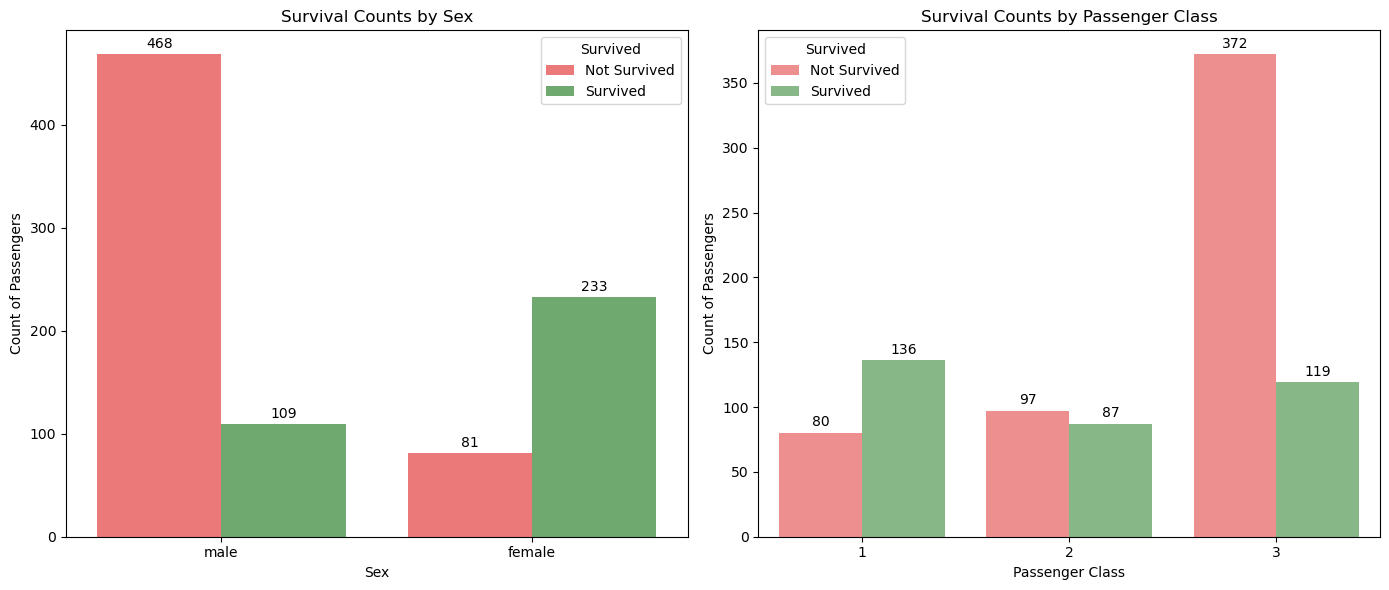

In [982]:
plot_categorial_survival_counts_sex_and_pclass(titanic)

In [976]:
def plot_box_age_survived_pclass(titanic):
    """
    Creates a box plot showing the distribution of Age by Survival Status and Passenger Class.

    The plot displays:
    - Age on the y-axis
    - Survival status on the x-axis
    - Different colors for each passenger class.
    """
    plt.figure(figsize=(12, 6))
    palette = sns.color_palette("Set1", n_colors=3)
    
    # Create the box plot with hue for passenger class
    sns.boxplot(data=titanic, x='Survived', y='Age', hue='Pclass', palette='Set1')

    # Title, labels and legend
    plt.title('Box Plot of Age by Survival Status and Passenger Class')
    plt.xlabel('Survival Status')
    plt.ylabel('Age')
    plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
    #plt.legend(title='Passenger Class', loc='upper right', labels=['1st Class', '2nd Class', '3rd Class'])
    
    # Manually create a legend for Passenger Class
    handles = [
        plt.Line2D([0], [0], color=palette[0], lw=4, label='1st Class'),
        plt.Line2D([0], [0], color=palette[1], lw=4, label='2nd Class'),
        plt.Line2D([0], [0], color=palette[2], lw=4, label='3rd Class')
    ]
    plt.legend(handles=handles, title='Passenger Class', loc='upper right')
    plt.grid(True)
    
    # Show the plot
    plt.show()

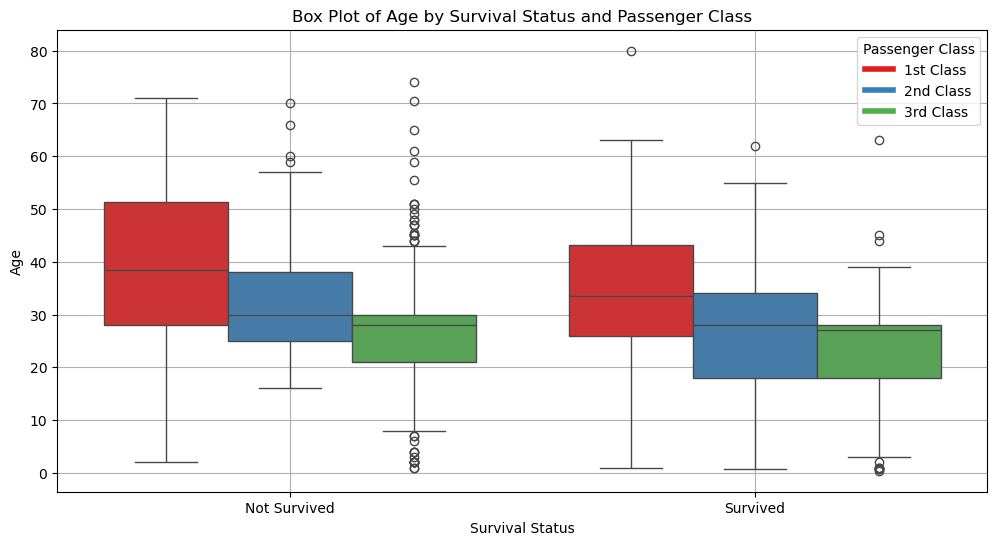

In [978]:
plot_box_age_survived_pclass(titanic)